## commuter analysis
Do commuter analysis for a year, hard to completely automate, as fit to distribution is a bit fragile and might have to be tuned by hand.
Eventually collect analysis for many years and plot results.
Perform same steps as done in notebook 01_initial_checks, for simplicity only use start times for this analysis.

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

### per year

#### citibike data

In [2]:
year = 2024
# for now only full analysis, nto for core_region

In [3]:
#read in start times for a certain year for each month
time_data_list_year = []

base_folder_name = str(year) + "-citibike-tripdata"
month_list = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
numbers_2_name = {"01": "1_January", "02": "2_February", "03": "3_March", "04": "4_April",
                 "05": "5_May", "06": "6_June", "07": "7_July", "08": "8_August",
                 "09": "9_September", "10": "10_October", "11": "11_November", "12": "12_December"}

# read in successively all data for month, then for all months
for month in month_list:
    print("month: " + month)

    # get used folder/filename
    month_folder_name_new = str(year) + month + "-citibike-tripdata"

    # set path to csv files depending on year
    full_path = ""
    if year in [2020, 2021, 2022, 2023, 2024]:
        full_path = "Data/" + base_folder_name + "/" + month_folder_name_new + "/"
    elif year in [2013, 2014, 2015, 2016, 2017, 2018, 2019]:
        full_path = "Data/" + base_folder_name + "/" + numbers_2_name[month] + "/"

    # collect all files for the month
    df_list = []
    for filename in os.listdir(full_path):
        if filename.endswith(".csv") and month_folder_name_new in filename:
            print(filename)
            df_month_start_time_partial = pd.read_csv(full_path + filename)

            # special treatment and renaming of columns if year before 2020
            if year in [2013, 2014, 2015, 2016, 2017, 2018, 2019]:
                if 'User Type' in df_month_start_time_partial.columns:
                    df_month_start_time_partial = df_month_start_time_partial.drop(['Birth Year', 'Gender', 'User Type'], axis=1)
                    df_month_start_time_partial = df_month_start_time_partial.rename(
                        columns={'Start Time': 'started_at', 'Stop Time': 'ended_at',
                                 'Start Station ID': 'start_station_id', 'Start Station Name': 'start_station_name',
                                 'Start Station Latitude': 'start_lat', 'Start Station Longitude': 'start_lng',
                                 'End Station ID': 'end_station_id', 'End Station Name': 'end_station_name',
                                 'End Station Latitude': 'end_lat', 'End Station Longitude': 'end_lng'})
                elif 'usertype' in df_month_start_time_partial.columns:
                    df_month_start_time_partial = df_month_start_time_partial.drop(['birth year', 'gender', 'usertype'], axis=1)
                    df_month_start_time_partial = df_month_start_time_partial.rename(
                        columns={'starttime': 'started_at', 'stoptime': 'ended_at',
                                 'start station id': 'start_station_id', 'start station name': 'start_station_name',
                                 'start station latitude': 'start_lat', 'start station longitude': 'start_lng',
                                 'end station id': 'end_station_id', 'end station name': 'end_station_name',
                                 'end station latitude': 'end_lat', 'end station longitude': 'end_lng'})

            #if "-" in df_month_start_time_partial['started_at'].loc[[0]]:
                
            df_month_start_time_partial = pd.DataFrame(df_month_start_time_partial['started_at'])
            df_list.append(df_month_start_time_partial)

    print(df_list)
    if len(df_list) > 0:
        df_month_start_time = pd.concat(df_list, axis=0, ignore_index=True)
    else:
        df_month_start_time = pd.DataFrame()
        print("no data for month: " + month)

    time_data_list_year.append(df_month_start_time)

month: 01
202401-citibike-tripdata.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                      started_at
0        2024-01-22 18:43:19.012
1        2024-01-11 19:19:18.721
2        2024-01-30 19:17:41.693
3        2024-01-27 11:27:01.759
4        2024-01-16 15:15:41.000
...                          ...
1888080  2024-01-29 07:40:32.831
1888081  2024-01-29 11:56:47.527
1888082  2024-01-12 16:51:37.231
1888083  2024-01-26 09:32:45.932
1888084  2024-01-29 17:29:55.879

[1888085 rows x 1 columns]]
month: 02
202402-citibike-tripdata.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                      started_at
0        2024-02-25 20:25:40.894
1        2024-02-21 22:21:38.446
2        2024-02-14 08:31:14.609
3        2024-02-05 08:42:25.999
4        2024-02-08 11:13:15.969
...                          ...
2121496  2024-02-08 19:55:20.590
2121497  2024-02-24 09:37:13.343
2121498  2024-02-12 18:07:55.640
2121499  2024-02-22 09:12:00.967
2121500  2024-02-28 17:32:58.667

[2121501 rows x 1 columns]]
month: 03
202403-citibike-tripdata.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                      started_at
0        2024-03-13 15:57:41.800
1        2024-03-16 10:25:46.114
2        2024-03-20 19:20:49.818
3        2024-03-13 20:31:12.599
4        2024-03-16 10:50:11.535
...                          ...
2663290  2024-03-15 11:44:14.141
2663291  2024-03-18 16:50:23.185
2663292  2024-03-20 11:35:21.922
2663293  2024-03-15 09:29:16.009
2663294  2024-03-18 14:51:20.408

[2663295 rows x 1 columns]]
month: 04
202404-citibike-tripdata.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                      started_at
0        2024-04-27 13:56:13.940
1        2024-04-25 15:23:14.529
2        2024-04-06 11:15:18.132
3        2024-04-06 16:19:25.749
4        2024-04-10 17:40:14.700
...                          ...
3217058  2024-04-16 07:47:35.966
3217059  2024-04-10 08:45:16.500
3217060  2024-04-09 17:44:45.398
3217061  2024-04-03 14:42:57.301
3217062  2024-04-25 11:38:01.936

[3217063 rows x 1 columns]]
month: 05
202405-citibike-tripdata_1.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_2.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_3.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_4.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202405-citibike-tripdata_5.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                 started_at
0       2024-05-01 08:05:53
1       2024-05-10 15:00:06
2       2024-05-06 12:28:39
3       2024-05-16 16:09:14
4       2024-05-29 15:43:37
...                     ...
999995  2024-05-12 18:44:44
999996  2024-05-11 07:45:19
999997  2024-05-04 11:21:56
999998  2024-05-01 18:07:57
999999  2024-05-16 12:24:02

[1000000 rows x 1 columns],                  started_at
0       2024-05-19 07:27:00
1       2024-05-18 22:30:31
2       2024-05-29 07:13:37
3       2024-05-11 22:14:23
4       2024-05-09 07:54:28
...                     ...
999995  2024-05-02 17:30:03
999996  2024-05-07 10:22:29
999997  2024-05-08 22:45:49
999998  2024-05-19 09:47:41
999999  2024-05-23 10:35:00

[1000000 rows x 1 columns],                  started_at
0       2024-05-24 19:59:29
1       2024-05-10 14:57:00
2       2024-05-10 18:09:04
3       2024-05-19 13:37:37
4       2024-05-24 18:12:40
...                     ...
999995  2024-05-28 06:06:15
999996  2024-05-23 06:04:23
999997  2024-05-2

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_2.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_3.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_4.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202406-citibike-tripdata_5.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                     started_at
0       2024-06-12 17:47:23.952
1       2024-06-04 16:48:42.876
2       2024-06-01 13:36:28.502
3       2024-06-01 03:12:09.636
4       2024-06-08 13:14:31.197
...                         ...
999995  2024-06-11 18:44:53.460
999996  2024-06-03 12:28:30.970
999997  2024-06-02 14:45:16.728
999998  2024-06-13 13:53:43.523
999999  2024-06-04 15:55:44.618

[1000000 rows x 1 columns],                      started_at
0       2024-06-14 14:57:26.042
1       2024-06-03 17:33:07.804
2       2024-06-01 16:05:57.549
3       2024-06-10 09:15:33.827
4       2024-06-14 06:37:11.937
...                         ...
999995  2024-06-04 09:31:45.239
999996  2024-06-01 18:03:26.911
999997  2024-06-12 18:18:54.443
999998  2024-06-05 12:40:01.985
999999  2024-06-10 19:08:27.170

[1000000 rows x 1 columns],                      started_at
0       2024-06-08 15:03:44.426
1       2024-06-14 16:07:57.080
2       2024-06-13 15:57:58.679
3       2024-06-07 15:56:43.447
4       2024-

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_2.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_3.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_4.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202407-citibike-tripdata_5.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                     started_at
0       2024-07-01 21:00:55.640
1       2024-07-09 18:28:39.551
2       2024-07-14 17:10:28.899
3       2024-07-01 11:37:06.440
4       2024-07-05 16:55:59.093
...                         ...
999995  2024-07-03 08:52:58.314
999996  2024-07-08 20:06:23.197
999997  2024-07-09 17:46:31.953
999998  2024-07-03 06:50:47.228
999999  2024-07-05 21:49:34.032

[1000000 rows x 1 columns],                      started_at
0       2024-07-02 08:26:28.316
1       2024-07-02 08:27:59.491
2       2024-07-11 20:33:33.562
3       2024-07-10 07:10:18.952
4       2024-07-11 20:56:38.871
...                         ...
999995  2024-07-23 05:21:41.512
999996  2024-07-31 14:52:38.480
999997  2024-07-29 13:29:15.222
999998  2024-07-25 09:42:03.424
999999  2024-07-30 22:06:59.735

[1000000 rows x 1 columns],                      started_at
0       2024-07-18 18:32:31.441
1       2024-07-22 06:57:54.793
2       2024-07-30 15:41:49.636
3       2024-07-22 19:11:06.154
4       2024-

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_2.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_3.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_4.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202408-citibike-tripdata_5.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                     started_at
0       2024-08-11 13:40:50.958
1       2024-08-05 08:12:49.336
2       2024-08-09 13:39:16.596
3       2024-08-07 15:01:31.370
4       2024-08-14 15:49:34.500
...                         ...
999995  2024-08-10 11:27:42.492
999996  2024-08-01 06:57:28.809
999997  2024-08-05 07:07:46.399
999998  2024-08-13 14:41:04.043
999999  2024-08-04 09:33:35.306

[1000000 rows x 1 columns],                      started_at
0       2024-08-12 17:46:58.412
1       2024-08-09 16:59:38.827
2       2024-08-01 17:03:53.128
3       2024-08-13 19:15:09.641
4       2024-08-10 13:32:18.417
...                         ...
999995  2024-08-30 19:50:48.548
999996  2024-08-18 17:16:06.366
999997  2024-08-23 19:29:23.781
999998  2024-08-30 13:16:23.546
999999  2024-08-31 15:29:45.502

[1000000 rows x 1 columns],                      started_at
0       2024-08-17 11:42:14.451
1       2024-08-17 11:42:06.786
2       2024-08-22 07:18:43.412
3       2024-08-21 17:59:51.350
4       2024-

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_2.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_3.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_4.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202409-citibike-tripdata_5.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                     started_at
0       2024-09-10 22:50:16.212
1       2024-09-22 05:51:00.609
2       2024-09-24 11:07:40.618
3       2024-09-03 14:25:28.732
4       2024-09-09 15:46:50.376
...                         ...
999995  2024-09-17 16:35:49.434
999996  2024-09-14 11:18:38.355
999997  2024-09-16 17:32:02.654
999998  2024-09-01 16:35:11.171
999999  2024-09-01 00:02:04.914

[1000000 rows x 1 columns],                      started_at
0       2024-09-06 18:53:56.193
1       2024-09-02 21:09:09.862
2       2024-09-17 07:29:14.311
3       2024-09-13 12:39:51.392
4       2024-09-23 08:52:08.749
...                         ...
999995  2024-09-25 00:06:03.590
999996  2024-09-29 18:36:52.114
999997  2024-09-14 17:12:25.052
999998  2024-09-13 19:17:25.485
999999  2024-09-30 18:26:27.379

[1000000 rows x 1 columns],                      started_at
0       2024-09-05 11:20:41.979
1       2024-09-05 13:27:05.758
2       2024-09-17 04:30:05.665
3       2024-09-03 13:18:55.618
4       2024-

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_2.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_3.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_4.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_5.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202410-citibike-tripdata_6.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                     started_at
0       2024-10-13 17:38:36.748
1       2024-10-06 00:58:33.042
2       2024-10-11 21:15:40.455
3       2024-10-14 19:08:12.154
4       2024-10-13 01:19:20.877
...                         ...
999995  2024-10-08 07:07:37.902
999996  2024-10-12 12:42:05.626
999997  2024-10-04 07:34:13.461
999998  2024-10-01 07:04:32.165
999999  2024-10-03 07:25:09.077

[1000000 rows x 1 columns],                      started_at
0       2024-10-08 12:45:29.391
1       2024-10-12 10:53:22.144
2       2024-10-03 21:00:32.014
3       2024-10-13 14:54:08.380
4       2024-10-12 16:52:03.748
...                         ...
999995  2024-10-01 19:04:09.111
999996  2024-10-09 15:16:07.042
999997  2024-10-09 18:47:16.219
999998  2024-10-04 10:42:31.824
999999  2024-10-14 11:27:44.958

[1000000 rows x 1 columns],                      started_at
0       2024-10-01 13:43:40.412
1       2024-10-05 14:26:32.015
2       2024-10-03 23:13:46.667
3       2024-10-05 00:18:35.593
4       2024-

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_2.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_3.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202411-citibike-tripdata_4.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


[                     started_at
0       2024-11-09 12:34:17.909
1       2024-11-25 21:07:32.005
2       2024-11-16 01:13:03.167
3       2024-11-24 00:20:20.762
4       2024-11-14 09:24:15.552
...                         ...
999995  2024-11-13 14:41:41.028
999996  2024-11-14 17:18:49.656
999997  2024-11-10 14:31:48.437
999998  2024-11-08 17:51:56.783
999999  2024-11-06 17:07:34.212

[1000000 rows x 1 columns],                      started_at
0       2024-11-03 15:44:15.194
1       2024-11-03 16:11:59.711
2       2024-11-22 16:12:17.236
3       2024-11-13 12:04:42.291
4       2024-11-14 16:16:26.758
...                         ...
999995  2024-11-23 09:38:24.070
999996  2024-11-06 16:18:30.412
999997  2024-11-20 07:47:26.031
999998  2024-11-26 20:13:21.341
999999  2024-11-30 17:23:27.403

[1000000 rows x 1 columns],                      started_at
0       2024-11-08 10:11:59.003
1       2024-11-19 09:09:35.168
2       2024-11-14 10:13:06.926
3       2024-11-25 10:14:34.994
4       2024-

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202412-citibike-tripdata_2.csv


C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\182295759.py:29: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month_start_time_partial = pd.read_csv(full_path + filename)


202412-citibike-tripdata_3.csv
[                     started_at
0       2024-12-14 10:58:18.153
1       2024-12-12 14:46:12.473
2       2024-12-11 07:55:18.770
3       2024-12-09 22:51:11.668
4       2024-12-10 18:48:40.063
...                         ...
999995  2024-12-06 18:43:51.866
999996  2024-12-10 10:34:58.071
999997  2024-12-03 14:02:29.375
999998  2024-12-05 07:03:08.210
999999  2024-12-09 08:33:59.397

[1000000 rows x 1 columns],                      started_at
0       2024-12-05 08:43:37.066
1       2024-12-05 14:40:24.012
2       2024-12-09 05:28:38.323
3       2024-12-14 10:50:21.428
4       2024-12-11 14:16:08.864
...                         ...
999995  2024-12-21 19:08:07.762
999996  2024-12-17 18:59:56.045
999997  2024-12-18 06:44:59.074
999998  2024-12-20 20:53:58.339
999999  2024-12-23 18:57:11.252

[1000000 rows x 1 columns],                      started_at
0       2024-12-16 14:23:24.629
1       2024-12-27 10:06:22.659
2       2024-12-21 00:55:15.551
3       2024-1

In [4]:
# do count values for each month separately and then join the results
# otherwise tables get too large
time_series_workday_list = []
time_series_weekend_list = []

for i, time_data in enumerate(time_data_list_year): 
    df = time_data
    df[['date', 'time']] = df['started_at'].str.split(' ', n=1, expand=True)
    df.time = df.time.apply(lambda string : string.split(':')[0]).astype(int)
    df.date = pd.to_datetime(df.date)
    df['day'] = df['date'].dt.weekday
    df
    
    start_times_workday = df[df['day'].isin([0, 1, 2, 3, 4])]
    start_times_weekend = df[df['day'].isin([5,6])]
    
    time_series_workday = pd.DataFrame(start_times_workday['time'].value_counts()).sort_values(['time'])
    time_series_workday = time_series_workday.rename(columns={'count': 'count'+str(i)})
    time_series_weekend = pd.DataFrame(start_times_weekend['time'].value_counts()).sort_values(['time'])
    time_series_weekend = time_series_weekend.rename(columns={'count': 'count'+str(i)})

    time_series_workday_list.append(time_series_workday)
    time_series_weekend_list.append(time_series_weekend)
    #print(time_series_workday)
    #print(time_series_weekend)
    count = i + 1


In [5]:
# merge df into one and create sum column
time_series_workday_year = pd.concat(time_series_workday_list, axis=1)
time_series_weekend_year = pd.concat(time_series_weekend_list, axis=1)

column_names = []
for i in range(0,12):
   column_names.append('count'+str(i))

time_series_workday_year['total'] = time_series_workday_year[column_names].sum(axis=1)
time_series_weekend_year['total'] = time_series_weekend_year[column_names].sum(axis=1)

time_series_workday_year
#time_series_weekend_year

,count0,count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,total
time,,,,,,,,,,,,,
0,13287,13088,16733,21262,34402,39749,45978,41246,39283,38878,29856,18744,352506
1,8181,6603,8930,10977,18442,20690,24449,22081,20114,19439,15560,9697,185163
2,5779,3947,5441,6630,10652,12276,14415,13101,12246,11485,9733,6056,111761
3,3822,2880,3680,4449,7151,7779,8907,8482,8216,8017,6688,4090,74161
4,4577,4135,5134,6169,8046,8165,9940,9537,9165,9524,7750,5423,87565
5,14720,14662,16660,18982,23817,24993,28232,27133,27935,29138,21672,16677,264621
6,40516,41710,45187,55446,71518,73847,80377,77076,83794,85201,64077,44200,762949
7,85146,88382,100676,113672,155739,145044,149223,144778,189969,195194,141030,96607,1605460
8,130756,135669,157570,174172,231138,223798,231028,227482,280247,300793,204293,144278,2441224


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[352506, 185163, 111761, 74161, 87565, 264621, 762949, 1605460, 2441224, 1824062, 1334555, 1360424, 1533547, 1629316, 1824864, 2073233, 2417154, 3240119, 3018678, 2231863, 1599400, 1189700, 962788, 689902]


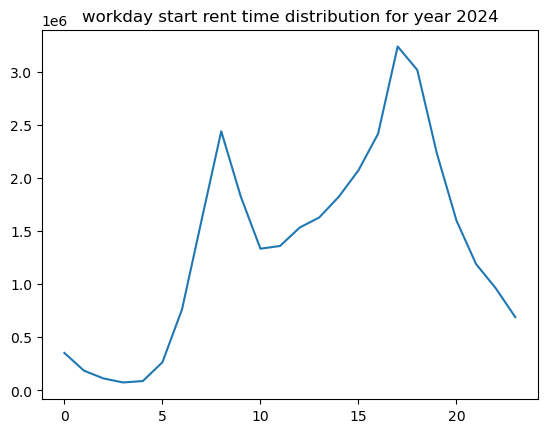

32815015


In [6]:
x, y = (list(time_series_workday_year.index), list(time_series_workday_year['total']))
print(x)
print(y)

plt.plot(x,y)
plt.title('workday start rent time distribution for year '+ str(year))
plt.show()
print(time_series_workday_year['total'].sum())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[272133, 190709, 129073, 86582, 57499, 47695, 94334, 174990, 297718, 471595, 636237, 770356, 867060, 909369, 932610, 935971, 898530, 848481, 795333, 663671, 500944, 392341, 334864, 276498]


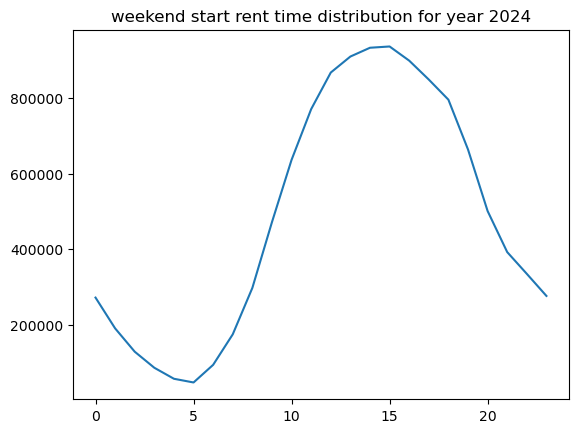

11584593


In [7]:
x, y = (list(time_series_weekend_year.index), list(time_series_weekend_year['total']))
print(x)
print(y)

plt.plot(x,y)
plt.title('weekend start rent time distribution for year '+ str(year))
plt.show()
print(time_series_weekend_year['total'].sum())

In [8]:
# write out to save time as it takes time to generate them
time_series_workday_year.to_csv("intermediate_results/time_series_workday_year_"+ str(year)+".txt")
time_series_weekend_year.to_csv("intermediate_results/time_series_weekend_year_"+ str(year)+".txt")


In [9]:
#symmetrize for fitting
print(time_series_workday_year['total'].min())
print(time_series_workday_year['total'].idxmin())
time_series_workday_year.head(time_series_workday_year['total'].idxmin())

time_series = pd.concat([time_series_workday_year.tail(len(time_series_workday_year)-time_series_workday_year['total'].idxmin()), time_series_workday_year.head(time_series_workday_year['total'].idxmin())])
time_series = time_series.reset_index()
time_series = time_series[['time', 'total']]
time_series

74161
3


,time,total
0,3,74161
1,4,87565
2,5,264621
3,6,762949
4,7,1605460
5,8,2441224
6,9,1824062
7,10,1334555
8,11,1360424
9,12,1533547


In [10]:
x, y = (list(time_series.index), list(time_series['total']))
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[74161, 87565, 264621, 762949, 1605460, 2441224, 1824062, 1334555, 1360424, 1533547, 1629316, 1824864, 2073233, 2417154, 3240119, 3018678, 2231863, 1599400, 1189700, 962788, 689902, 352506, 185163, 111761]


[4.91184710e+00 1.80894824e+06 1.59994562e+00 1.27781508e+01
 2.00684060e+06 6.84848839e+00 1.45884424e+01 1.37522460e+06
 1.57692842e+00]


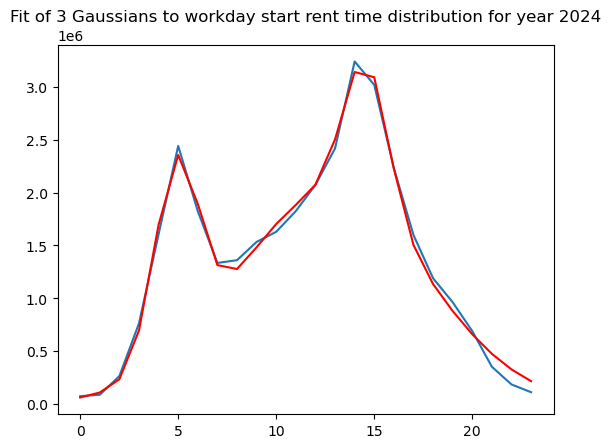

In [11]:
# fit 3 Gaussians to get estimate on percentage of commuters

def func(x, *params):
    y = np.zeros_like(x)
    #for i in range(0, len(params), 3):
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

def single_func(x, ctr, amp, wid):
    return amp * np.exp( -((x - ctr)/wid)**2)

# guessed centers are 8-3=5, 15-3=12, 18-3=15
guess = [5, 2000000, 2, 12, 1000000, 4, 15, 2000000, 2]

popt, pcov = curve_fit(func, x, y, p0=guess, maxfev = 2000)
print(popt)
fit = func(x, *popt)

plt.plot(x, y)
plt.plot(x, fit , 'r-')
plt.title('Fit of 3 Gaussians to workday start rent time distribution for year '+str(year))
plt.show()

In [12]:
# compute percentage of commute trips
# compute area under all 3 curves with delta t = 1 (hour)
area_all = sum(y)
print(area_all)

# compute area under 1st and last gaussian
ctr_1 = popt[0]
amp_1 = popt[1]
wid_1 = popt[2]
y1 = single_func(x, ctr_1, amp_1, wid_1)

ctr_3 = popt[6]
amp_3 = popt[7]
wid_3 = popt[8]
y3 = single_func(x, ctr_3, amp_3, wid_3)

area_commuters = sum(y1+y3)
print(area_commuters)

#missing area
ctr_2 = popt[3]
amp_2 = popt[4]
wid_2 = popt[5]
y2 = single_func(x, ctr_2, amp_2, wid_2)

area_missing = sum(y2)
print(area_missing)

# percentage commuters
print(area_commuters/area_all)
print(area_missing/area_all)
print(area_commuters/area_all + area_missing/area_all)


32815015
8973665.126323314
23963560.518048894
0.2734621674353437
0.7302620619874437
1.0037242294227875


In [13]:
#write also out to file
with open("intermediate_results/commuter_results_"+str(year)+".txt", "w") as f:
    #header:
    f.write("sum of all weekend trips\tsum of all workday trips\tpercentage commuters workday\n")
    #values:
    f.write(str(time_series_weekend_year['total'].sum())+"\t"+str(time_series_workday_year['total'].sum())+"\t"+str(area_commuters/area_all)+"\n")

In [14]:
# read in commuter results
results = {}
for year in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    with open("intermediate_results/commuter_results_"+str(year)+".txt", "r") as f:
        for line in f:
            if not line.startswith("sum"):
                entries = line.split("\t")
                sum_weekend_trips = entries[0]
                sum_workday_trips = entries[1]
                percentage_commuters_workday = entries[2]

    if 'weekend_trips' in results.keys():
        results['weekend_trips'].append(int(sum_weekend_trips)) 
        results['workday_trips'].append(int(sum_workday_trips))
        results['perc_commuters_workdays'].append(float(percentage_commuters_workday))
        results['year'].append(year)
    else:
        results['weekend_trips'] = [int(sum_weekend_trips)]
        results['workday_trips'] = [int(sum_workday_trips)]
        results['perc_commuters_workdays'] = [float(percentage_commuters_workday)]
        results['year'] = [year]

df_result = pd.DataFrame.from_dict(results)
df_result['commuters_workdays'] = df_result['workday_trips'] * df_result['perc_commuters_workdays']
df_result

,weekend_trips,workday_trips,perc_commuters_workdays,year,commuters_workdays
0,1973982,6107234,0.353062,2014,2.156234e+06
1,2330637,7607332,0.360138,2015,2.739691e+06
2,3222171,10623484,0.367785,2016,3.907161e+06
3,3958939,12405718,0.364827,2017,4.525937e+06
4,4235296,13313043,0.357801,2018,4.763427e+06
5,5205871,15345826,0.355015,2019,5.448002e+06
6,5973274,13589040,0.268619,2020,3.650275e+06
7,7496367,19633755,0.233176,2021,4.578116e+06
8,7982637,21856169,0.255749,2022,5.589703e+06
9,8970938,26136092,0.264889,2023,6.923171e+06


(0.0, 1.0)

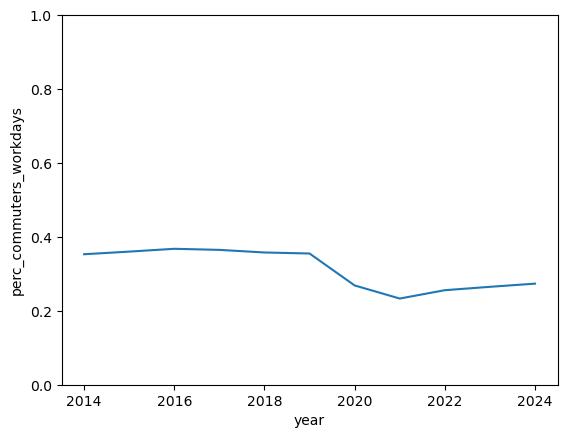

In [15]:
# plot commuter percentage over years and workday/weekend ratio
sns.lineplot(data=df_result, x='year', y='perc_commuters_workdays')
plt.ylim(0,1)

<Axes: xlabel='year', ylabel='commuters_workdays'>

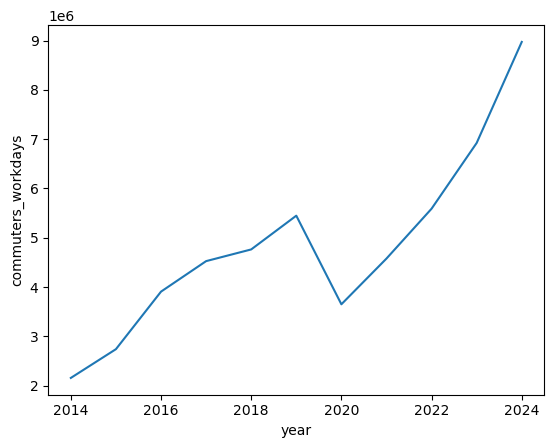

In [16]:
# plot commuter percentage over years and workday/weekend ratio
sns.lineplot(data=df_result, x='year', y='commuters_workdays')


#### NYC accidents data

In [17]:
#Einlesen der Unfall Daten von NYC
table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")
table_accidents

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\609313036.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162654,03/15/2025,0:00,MANHATTAN,10011.0,40.737858,-73.996704,"(40.737858, -73.996704)",NaN,NaN,541 AVENUE OF THE AMERICAS,...,Unspecified,NaN,NaN,NaN,4799150,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2162655,03/15/2025,14:08,NaN,NaN,40.623123,-74.167595,"(40.623123, -74.167595)",LISK AVE,SOUTH AVE,NaN,...,Unspecified,NaN,NaN,NaN,4799203,Taxi,Pick-up Truck,NaN,NaN,NaN
2162656,03/15/2025,10:09,NaN,NaN,40.787760,-73.791370,"(40.78776, -73.79137)",CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4798984,Sedan,NaN,NaN,NaN,NaN
2162657,03/15/2025,17:30,QUEENS,11373.0,40.746740,-73.883640,"(40.74674, -73.88364)",NaN,NaN,40-31 82 ST,...,Unspecified,NaN,NaN,NaN,4799434,Sedan,Sedan,NaN,NaN,NaN


In [18]:
# restrict to year of interest
table_accidents["CRASH DATE"]= pd.to_datetime(table_accidents["CRASH DATE"])

table_accidents_year = table_accidents[table_accidents["CRASH DATE"].dt.year == year]
table_accidents_year

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1230,2024-09-13,14:20,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,4761583,Sedan,Pick-up Truck,NaN,NaN,NaN
1925,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",BELT PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761266,Bike,E-Bike,NaN,NaN,NaN
2991,2024-10-05,13:43,NaN,NaN,NaN,NaN,NaN,MENAHAN STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4761112,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3797,2024-10-04,6:05,NaN,NaN,NaN,NaN,NaN,WESTCHESTER SQUARE,NaN,NaN,...,NaN,NaN,NaN,NaN,4761546,Sedan,NaN,NaN,NaN,NaN
4722,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4757494,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161591,2024-11-23,1:18,BROOKLYN,11207.0,40.688744,-73.908745,"(40.688744, -73.908745)",CENTRAL AVE,SCHAEFER ST,NaN,...,Unspecified,NaN,NaN,NaN,4798519,Sedan,NaN,NaN,NaN,NaN
2161697,2024-10-31,1:25,BROOKLYN,11207.0,40.687080,-73.913895,"(40.68708, -73.913895)",BUSHWICK AVE,HALSEY ST,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4798441,Moped,NaN,NaN,NaN,NaN
2161860,2024-12-02,10:12,MANHATTAN,10018.0,40.752853,-73.992980,"(40.752853, -73.99298)",8 AVE,W 35 ST,NaN,...,NaN,NaN,NaN,NaN,4798999,NaN,NaN,NaN,NaN,NaN
2161893,2024-12-22,19:15,BROOKLYN,11237.0,40.698536,-73.917870,"(40.698536, -73.91787)",BLEECKER ST,KNICKERBOCKER AVE,NaN,...,Unspecified,NaN,NaN,NaN,4798545,Bike,NaN,NaN,NaN,NaN


In [19]:
table_accidents_year['hour'] = pd.to_datetime(table_accidents_year['CRASH TIME'], format='%H:%M').dt.strftime("%H").astype(int)
table_accidents_year['day'] = table_accidents_year['CRASH DATE'].dt.weekday
table_accidents_year['workday'] = table_accidents_year['day'].isin([0, 1, 2, 3, 4]).astype(int)
table_accidents_year_workday = table_accidents_year[table_accidents_year['day'].isin([0, 1, 2, 3, 4])]
table_accidents_year_weekend = table_accidents_year[table_accidents_year['day'].isin([5,6])]

# restrict to cyclists involved
table_accidents_cyclist_year_workday = table_accidents_year_workday[(table_accidents_year_workday["NUMBER OF CYCLIST INJURED"] > 0) | (table_accidents_year_workday["NUMBER OF CYCLIST KILLED"] > 0)]
table_accidents_cyclist_year_weekend = table_accidents_year_weekend[(table_accidents_year_weekend["NUMBER OF CYCLIST INJURED"] > 0) | (table_accidents_year_weekend["NUMBER OF CYCLIST KILLED"] > 0)]

table_accidents_cyclist_year_workday
table_accidents_cyclist_year_weekend

C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\720698867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_accidents_year['hour'] = pd.to_datetime(table_accidents_year['CRASH TIME'], format='%H:%M').dt.strftime("%H").astype(int)
C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\720698867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_accidents_year['day'] = table_accidents_year['CRASH DATE'].dt.weekday
C:\Users\tzach\AppData\Local\Temp\ipykernel_20744\720698867.py:3: SettingWithCopyWar

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,hour,day,workday
1925,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",BELT PARKWAY,NaN,NaN,...,NaN,4761266,Bike,E-Bike,NaN,NaN,NaN,12,5,0
10564,2024-09-22,14:37,NaN,NaN,NaN,NaN,NaN,FLUSHING AVENUE,NaN,NaN,...,NaN,4758675,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,14,6,0
111826,2024-09-21,13:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59 CENTER DRIVE,...,NaN,4757831,Bike,NaN,NaN,NaN,NaN,13,5,0
120830,2024-09-21,20:15,NaN,NaN,NaN,NaN,NaN,BROADWAY,NaN,NaN,...,NaN,4757573,Bike,Taxi,NaN,NaN,NaN,20,5,0
141896,2024-09-21,5:15,BRONX,10459.0,NaN,NaN,NaN,LONGFELLOW AVENUE,BRUCKNER BOULEVARD,NaN,...,NaN,4757719,Bike,NaN,NaN,NaN,NaN,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151749,2024-12-28,14:40,MANHATTAN,10029.0,40.798824,-73.941680,"(40.798824, -73.94168)",NaN,NaN,137 E 116 ST,...,NaN,4782598,E-Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,14,5,0
2152464,2024-10-05,20:14,NaN,NaN,NaN,NaN,NaN,EAST 14 STREET,NaN,NaN,...,NaN,4789324,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,20,5,0
2153293,2024-11-24,12:00,BROOKLYN,11249.0,40.708900,-73.965805,"(40.7089, -73.965805)",BERRY ST,S 9 ST,NaN,...,NaN,4790190,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,12,6,0
2158284,2024-02-10,9:45,BROOKLYN,11225.0,40.665417,-73.965355,"(40.665417, -73.965355)",NaN,NaN,450 FLATBUSH AVE,...,NaN,4794998,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN,9,5,0


In [20]:
accidents_time_series_workday = pd.DataFrame(table_accidents_cyclist_year_workday['hour'].value_counts()).sort_values(['hour'])
accidents_time_series_weekend = pd.DataFrame(table_accidents_cyclist_year_weekend['hour'].value_counts()).sort_values(['hour'])
accidents_time_series_workday

,count
hour,
0,116
1,39
2,23
3,24
4,24
5,39
6,83
7,115
8,199


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[116, 39, 23, 24, 24, 39, 83, 115, 199, 165, 150, 152, 198, 212, 225, 245, 284, 317, 303, 249, 222, 170, 141, 94]


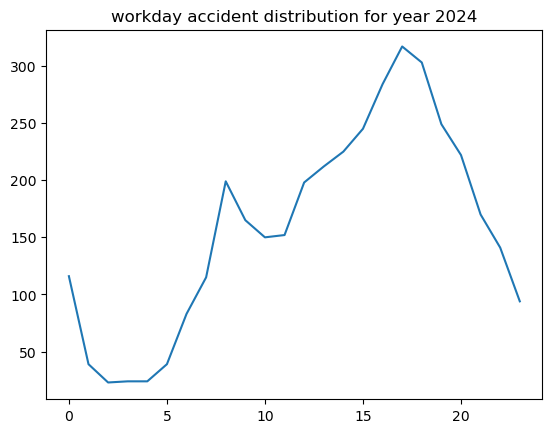

3789


In [21]:
x, y = (list(accidents_time_series_workday.index), list(accidents_time_series_workday['count']))
print(x)
print(y)

plt.plot(x,y)
plt.title('workday accident distribution for year '+ str(year))
plt.show()
print(accidents_time_series_workday['count'].sum())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[51, 32, 24, 19, 8, 15, 16, 19, 29, 45, 44, 71, 67, 69, 100, 94, 85, 86, 87, 97, 74, 67, 57, 40]


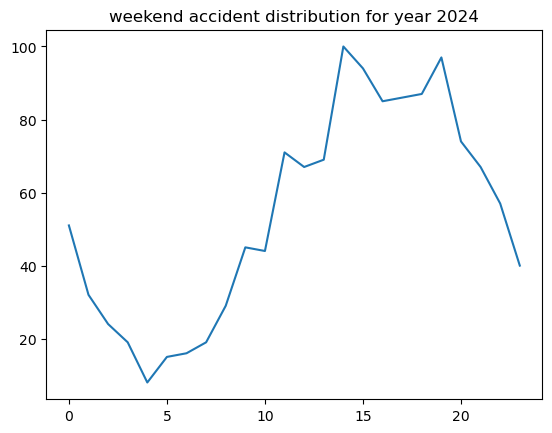

1296


In [22]:
x, y = (list(accidents_time_series_weekend.index), list(accidents_time_series_weekend['count']))
print(x)
print(y)

plt.plot(x,y)
plt.title('weekend accident distribution for year '+ str(year))
plt.show()
print(accidents_time_series_weekend['count'].sum())

In [23]:
#symmetrize for fitting
print(accidents_time_series_workday['count'].min())
print(accidents_time_series_workday['count'].idxmin())
accidents_time_series_workday.head(accidents_time_series_workday['count'].idxmin())

time_series = pd.concat([accidents_time_series_workday.tail(len(accidents_time_series_workday)-accidents_time_series_workday['count'].idxmin()), accidents_time_series_workday.head(accidents_time_series_workday['count'].idxmin())])
time_series = time_series.reset_index()
time_series

23
2


,hour,count
0,2,23
1,3,24
2,4,24
3,5,39
4,6,83
5,7,115
6,8,199
7,9,165
8,10,150
9,11,152


In [24]:
x, y = (list(time_series.index), list(time_series['count']))
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[23, 24, 24, 39, 83, 115, 199, 165, 150, 152, 198, 212, 225, 245, 284, 317, 303, 249, 222, 170, 141, 94, 116, 39]


[  6.02768027  98.72462767   1.12247296  13.74413348 229.31018602
   8.39769198  15.65029408  91.64449516   2.32489358]


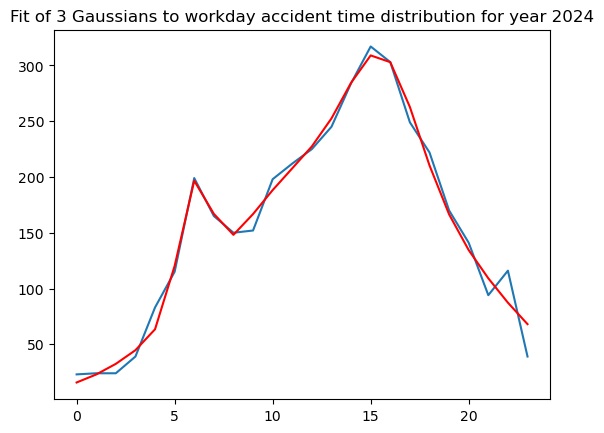

In [25]:
# guessed centers are 8-3=5, 15-3=12, 18-3=15
guess = [5, 200, 2, 11, 100, 4, 15, 200, 2]

popt, pcov = curve_fit(func, x, y, p0=guess, maxfev = 2000)
print(popt)
fit = func(x, *popt)

plt.plot(x, y)
plt.plot(x, fit , 'r-')
plt.title('Fit of 3 Gaussians to workday accident time distribution for year '+str(year))
plt.show()

In [26]:
# compute percentage of commute trips
# compute area under all 3 curves with delta t = 1 (hour)
area_all = sum(y)
print(area_all)

# compute area under 1st and last gaussian
ctr_1 = popt[0]
amp_1 = popt[1]
wid_1 = popt[2]
y1 = single_func(x, ctr_1, amp_1, wid_1)

ctr_3 = popt[6]
amp_3 = popt[7]
wid_3 = popt[8]
y3 = single_func(x, ctr_3, amp_3, wid_3)

area_commuters = sum(y1+y3)
print(area_commuters)

#missing area
ctr_2 = popt[3]
amp_2 = popt[4]
wid_2 = popt[5]
y2 = single_func(x, ctr_2, amp_2, wid_2)

area_missing = sum(y2)
print(area_missing)

# percentage commuters
print(area_commuters/area_all)
print(area_missing/area_all)
print(area_commuters/area_all + area_missing/area_all)


3789
574.0626307969344
3214.6678491296534
0.1515076882546673
0.8484211795010962
0.9999288677557635


In [27]:
#write also out to file
with open("intermediate_results/accident_commuter_results_"+str(year)+".txt", "w") as f:
    #header:
    f.write("sum of all weekend accidents\tsum of all workday accidents\tpercentage commuters workday accidents\n")
    #values:
    f.write(str(accidents_time_series_weekend['count'].sum())+"\t"+str(accidents_time_series_workday['count'].sum())+"\t"+str(area_commuters/area_all)+"\n")

In [28]:
# also read in and plot
results_accidents = {}
for year in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    with open("intermediate_results/accident_commuter_results_"+str(year)+".txt", "r") as f:
        for line in f:
            if not line.startswith("sum"):
                entries = line.split("\t")
                sum_weekend_trips = entries[0]
                sum_workday_trips = entries[1]
                percentage_commuters_workday = entries[2]

    if 'weekend_trips' in results_accidents.keys():
        results_accidents['weekend_trips'].append(int(sum_weekend_trips)) 
        results_accidents['workday_trips'].append(int(sum_workday_trips))
        results_accidents['perc_commuters_workdays'].append(float(percentage_commuters_workday))
        results_accidents['year'].append(year)
    else:
        results_accidents['weekend_trips'] = [int(sum_weekend_trips)]
        results_accidents['workday_trips'] = [int(sum_workday_trips)]
        results_accidents['perc_commuters_workdays'] = [float(percentage_commuters_workday)]
        results_accidents['year'] = [year]

df_result_accidents = pd.DataFrame.from_dict(results_accidents)
df_result_accidents['commuters_workdays'] = df_result_accidents['workday_trips'] * df_result_accidents['perc_commuters_workdays']
df_result_accidents

,weekend_trips,workday_trips,perc_commuters_workdays,year,commuters_workdays
0,1029,2970,0.277617,2014,824.523150
1,1047,3219,0.562534,2015,1810.795995
2,1208,3737,0.198132,2016,740.421083
3,1288,3577,0.198107,2017,708.629940
4,1193,3501,0.284229,2018,995.087035
5,1363,3601,0.607651,2019,2188.152262
6,1459,4023,0.091930,2020,369.833838
7,1274,3627,0.115479,2021,418.841386
8,1255,3704,0.124618,2022,461.583572
9,1269,3856,0.134825,2023,519.885524


(0.0, 1.0)

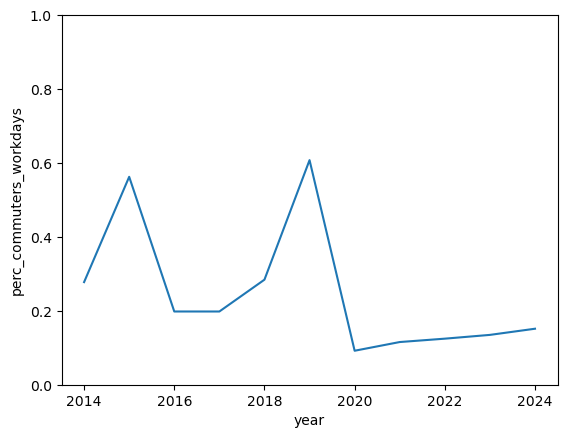

In [29]:
# plot commuter percentage over years and workday/weekend ratio
sns.lineplot(data=df_result_accidents, x='year', y='perc_commuters_workdays')
plt.ylim(0,1)

the plot shows that for 2019 and 2015 "something is off". It was also seen that for those years the plot didn´t function well, as there was too little data and not 3 gaussians could really be identified. Same then below.\
For the fit to work one needs a shoulder between the 2 commuter peaks, but as the number of bicycle accidents is quite low, for some years it doesn´t work. In contrast it seems to work properly for all years for the citibike data, as there is much better statistics.

<Axes: xlabel='year', ylabel='commuters_workdays'>

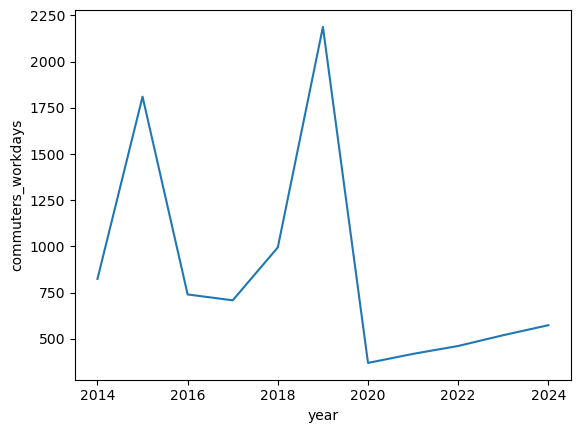

In [30]:
# plot commuter percentage over years and workday/weekend ratio
sns.lineplot(data=df_result_accidents, x='year', y='commuters_workdays')